## DAV 5400 Module 10 Assignment

# 1. Convert the table to a “tidy” long format.
This data violates Tidy Data guidelines since there are multiple observations contained within a single row of data AND there are multiple variable values contained within columns. For example, for Alaska Airlines we are given the number of “on time” arrivals for five separate cities within a single row of data. Within the columns, we are given both the number of “on time” and the number of “delayed” flights for multiple airlines. Tidy data guidelines require that each row of data should contain a single observation, and each column should contain data values pertaining to a single variable.

So we put Los Angeles, Phoenix, San Diego, San Francisco, Seattle into one column named destination, and we put on time and delayed in separate coulmns.

In [1]:
#first import pandas
import pandas as pd

#use the code provided in the assignment to read the file
filename = "https://raw.githubusercontent.com/675874815/DAV-5401/master/M10_Data.csv"
a = pd.read_csv(filename)
# show the dataframe
a

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [2]:
# specifying "how = 'all' " will cause dropna() to remove only those rows
# that are missing valid values for all columns
b = a.dropna(how='all')
# show the dataframe
b

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,NaN,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,NaN,delayed,117.0,415.0,65.0,129.0,61.0


In [3]:
# melt() requires that you specify the column to be used as the grouping indicator
# specify a subset of columns to be used as value columns
c = b.melt(id_vars = ['Unnamed: 0','Unnamed: 1'], value_vars = ['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])
# show the dataframe
c

,Unnamed: 0,Unnamed: 1,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,NaN,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,NaN,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,NaN,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,NaN,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,NaN,delayed,San Diego,20.0


In [4]:
# fill the missing values
c['Unnamed: 0'].fillna(method='ffill', inplace = True)
# show the dataframe
c

,Unnamed: 0,Unnamed: 1,variable,value
0,ALASKA,on time,Los Angeles,497.0
1,ALASKA,delayed,Los Angeles,62.0
2,AMWEST,on time,Los Angeles,694.0
3,AMWEST,delayed,Los Angeles,117.0
4,ALASKA,on time,Phoenix,221.0
5,ALASKA,delayed,Phoenix,12.0
6,AMWEST,on time,Phoenix,4840.0
7,AMWEST,delayed,Phoenix,415.0
8,ALASKA,on time,San Diego,212.0
9,ALASKA,delayed,San Diego,20.0


In [5]:
# melt() requires that you specify the column to be used as the grouping indicator
# specify a subset of columns to be used as value columns
d = b.melt(id_vars = ['Unnamed: 1'], value_vars = ['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle'])
# show the dataframe
d

,Unnamed: 1,variable,value
0,on time,Los Angeles,497.0
1,delayed,Los Angeles,62.0
2,on time,Los Angeles,694.0
3,delayed,Los Angeles,117.0
4,on time,Phoenix,221.0
5,delayed,Phoenix,12.0
6,on time,Phoenix,4840.0
7,delayed,Phoenix,415.0
8,on time,San Diego,212.0
9,delayed,San Diego,20.0


In [6]:
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "key"
e = pd.get_dummies(d['Unnamed: 1'])
# show the dataframe
e

,delayed,on time
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,1,0


In [7]:
# import numpy
import numpy as np
from numpy import nan

In [8]:
# select the value that meets the criteria
f = np.where(e['on time'], d['value'], nan)
f

array([ 497.,   nan,  694.,   nan,  221.,   nan, 4840.,   nan,  212.,
         nan,  383.,   nan,  503.,   nan,  320.,   nan, 1841.,   nan,
        201.,   nan])

In [9]:
# change a array to a list
g = f.tolist()
print(g)

[497.0, nan, 694.0, nan, 221.0, nan, 4840.0, nan, 212.0, nan, 383.0, nan, 503.0, nan, 320.0, nan, 1841.0, nan, 201.0, nan]


In [10]:
# select the value that meets the criteria
h = np.where(e['delayed'], d['value'], nan)
h

array([ nan,  62.,  nan, 117.,  nan,  12.,  nan, 415.,  nan,  20.,  nan,
        65.,  nan, 102.,  nan, 129.,  nan, 305.,  nan,  61.])

In [11]:
# change a array to a list
j = h.tolist()
print(j)

[nan, 62.0, nan, 117.0, nan, 12.0, nan, 415.0, nan, 20.0, nan, 65.0, nan, 102.0, nan, 129.0, nan, 305.0, nan, 61.0]


In [12]:
# add a column to dataframe
c['on time'] = g

In [13]:
# add a column to dataframe
c['delayed'] = j

In [14]:
# show the dataframe
c

,Unnamed: 0,Unnamed: 1,variable,value,on time,delayed
0,ALASKA,on time,Los Angeles,497.0,497.0,NaN
1,ALASKA,delayed,Los Angeles,62.0,NaN,62.0
2,AMWEST,on time,Los Angeles,694.0,694.0,NaN
3,AMWEST,delayed,Los Angeles,117.0,NaN,117.0
4,ALASKA,on time,Phoenix,221.0,221.0,NaN
5,ALASKA,delayed,Phoenix,12.0,NaN,12.0
6,AMWEST,on time,Phoenix,4840.0,4840.0,NaN
7,AMWEST,delayed,Phoenix,415.0,NaN,415.0
8,ALASKA,on time,San Diego,212.0,212.0,NaN
9,ALASKA,delayed,San Diego,20.0,NaN,20.0


In [15]:
# fill the missing values
c['on time'].fillna(method='ffill', inplace = True)
c

,Unnamed: 0,Unnamed: 1,variable,value,on time,delayed
0,ALASKA,on time,Los Angeles,497.0,497.0,NaN
1,ALASKA,delayed,Los Angeles,62.0,497.0,62.0
2,AMWEST,on time,Los Angeles,694.0,694.0,NaN
3,AMWEST,delayed,Los Angeles,117.0,694.0,117.0
4,ALASKA,on time,Phoenix,221.0,221.0,NaN
5,ALASKA,delayed,Phoenix,12.0,221.0,12.0
6,AMWEST,on time,Phoenix,4840.0,4840.0,NaN
7,AMWEST,delayed,Phoenix,415.0,4840.0,415.0
8,ALASKA,on time,San Diego,212.0,212.0,NaN
9,ALASKA,delayed,San Diego,20.0,212.0,20.0


In [16]:
# the dropna() method/function will automatically remove missing items
c.dropna(inplace = True)
c

,Unnamed: 0,Unnamed: 1,variable,value,on time,delayed
1,ALASKA,delayed,Los Angeles,62.0,497.0,62.0
3,AMWEST,delayed,Los Angeles,117.0,694.0,117.0
5,ALASKA,delayed,Phoenix,12.0,221.0,12.0
7,AMWEST,delayed,Phoenix,415.0,4840.0,415.0
9,ALASKA,delayed,San Diego,20.0,212.0,20.0
11,AMWEST,delayed,San Diego,65.0,383.0,65.0
13,ALASKA,delayed,San Francisco,102.0,503.0,102.0
15,AMWEST,delayed,San Francisco,129.0,320.0,129.0
17,ALASKA,delayed,Seattle,305.0,1841.0,305.0
19,AMWEST,delayed,Seattle,61.0,201.0,61.0


In [17]:
# delete the original 'value' column since it is no longer needed
c.drop(columns=['Unnamed: 1'], inplace = True)

In [18]:
# delete the original 'value' column since it is no longer needed
c.drop(columns=['value'], inplace = True)

In [19]:
# rename the 'Unnamed: 0' column to 'Airline' 
c.rename(columns={"Unnamed: 0": "Airline"}, inplace = True)

In [20]:
# rename the 'variable' column to 'Destination' 
c.rename(columns={"variable": "Destination"}, inplace = True)

In [21]:
# show the dataframe
c

,Airline,Destination,on time,delayed
1,ALASKA,Los Angeles,497.0,62.0
3,AMWEST,Los Angeles,694.0,117.0
5,ALASKA,Phoenix,221.0,12.0
7,AMWEST,Phoenix,4840.0,415.0
9,ALASKA,San Diego,212.0,20.0
11,AMWEST,San Diego,383.0,65.0
13,ALASKA,San Francisco,503.0,102.0
15,AMWEST,San Francisco,320.0,129.0
17,ALASKA,Seattle,1841.0,305.0
19,AMWEST,Seattle,201.0,61.0


In [22]:
# change the index
c.index = range(10)

In [23]:
# show the dataframe in long format
c

,Airline,Destination,on time,delayed
0,ALASKA,Los Angeles,497.0,62.0
1,AMWEST,Los Angeles,694.0,117.0
2,ALASKA,Phoenix,221.0,12.0
3,AMWEST,Phoenix,4840.0,415.0
4,ALASKA,San Diego,212.0,20.0
5,AMWEST,San Diego,383.0,65.0
6,ALASKA,San Francisco,503.0,102.0
7,AMWEST,San Francisco,320.0,129.0
8,ALASKA,Seattle,1841.0,305.0
9,AMWEST,Seattle,201.0,61.0


# 2. Perform analysis to compare the arrival delays for the two airlines.

## Task: Designate Research Questions

1. For each city, which airline had the best on time performance?

2. Which airline had the best overall on time performance?

3. Which airline had the worst overall delayed performance?

## Data Summary
There are 4 attributes in this dataset:

1. Airline;

2. Destination;

3. on time;

4. delayed;

The specific type of each data is below:

In [24]:
print(c.dtypes)

Airline         object
Destination     object
on time        float64
delayed        float64
dtype: object


As we can see, the data types of Airline, Destination are object, the data types of others are float.

## Exploratory Data Analysis (EDA)

Summary statistics for each attribute and appropriate graphical analysis for some attributes using Seaborn.

### Preliminary Data Analysis - Airline

Now we gather descriptive statistics on Airline and create a bar chart to display the frenquencies of two airlines.

In [25]:
# get descriptive stats for Airline
c['Airline'].describe()

count         10
unique         2
top       ALASKA
freq           5
Name: Airline, dtype: object

In [26]:
# import seaborn
import seaborn as sns
# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt

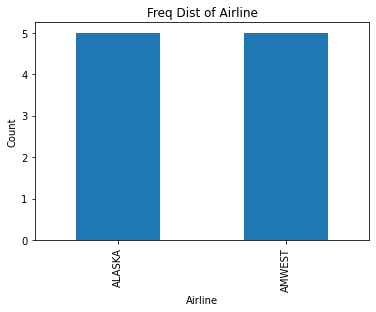

In [27]:
# create a bar plot for the Airline attribute
bplt1 = c['Airline'].value_counts().plot.bar(title = "Freq Dist of Airline")
plt.xlabel('Airline')
plt.ylabel('Count')
bplt1;

The frequency distribution of the Airline attribute provides us with a count of each airline.

### Preliminary Data Analysis - Destination

Now we gather descriptive statistics on Destination and create a bar chart to display the frenquencies of each destination.

In [28]:
# get descriptive stats for Destination
c['Destination'].describe()

count            10
unique            5
top       San Diego
freq              2
Name: Destination, dtype: object

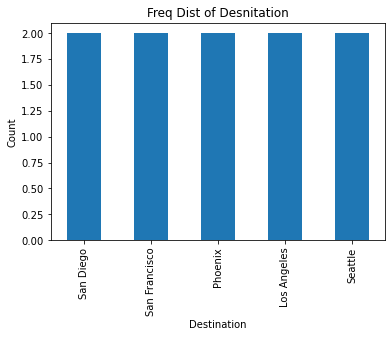

In [29]:
# create a bar plot for the Destination attribute
bplt2 = c['Destination'].value_counts().plot.bar(title = "Freq Dist of Desnitation")
plt.xlabel('Destination')
plt.ylabel('Count')
bplt2;

The frequency distribution of the Destination attribute provides us with a count of each destination.

### Preliminary Data Analysis - on time

Now we gather descriptive statistics on on time and create a histogram and a box plot to display these statistics in a visualization so that we can quickly identify the shape of the distribution.

In [30]:
# get descriptive stats for on time
c['on time'].describe()

count      10.000000
mean      971.200000
std      1443.280045
min       201.000000
25%       245.750000
50%       440.000000
75%       646.250000
max      4840.000000
Name: on time, dtype: float64

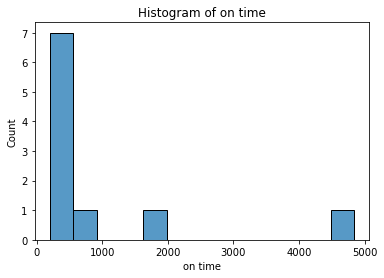

In [31]:
# define the type of plot you want to appear
sns.histplot(c['on time'])
# give the plot a title
plt.title('Histogram of on time')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


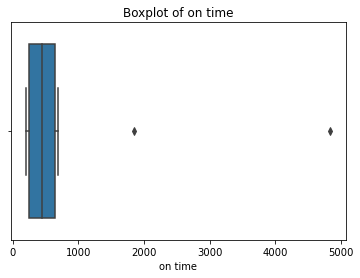

In [32]:
# define the type of plot you want to appear
sns.boxplot(c['on time'])
# give the plot a title
plt.title('Boxplot of on time')
plt.show();

We can see from the descriptive statistics that the distribution of on time is skewed right with a mean of 971.20, a minimum of 201, a max of 4840, and a standard deviation of 1443.28. Based on this information as well as the histogram and the box plot, there do appear to be some outliers.

### Preliminary Data Analysis - delayed

Now we gather descriptive statistics on delayed and create a histogram and a box plot to display these statistics in a visualization so that we can quickly identify the shape of the distribution.

In [33]:
# get descriptive stats for delayed
c['delayed'].describe()

count     10.000000
mean     128.800000
std      130.138217
min       12.000000
25%       61.250000
50%       83.500000
75%      126.000000
max      415.000000
Name: delayed, dtype: float64

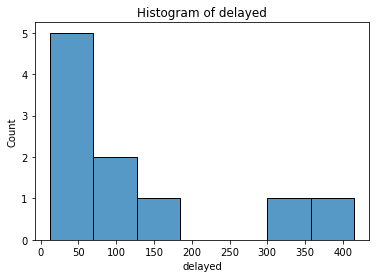

In [34]:
# define the type of plot you want to appear
sns.histplot(c['delayed'])
# give the plot a title
plt.title('Histogram of delayed')
# show the histogram
plt.show();

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


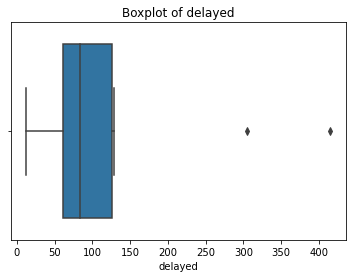

In [35]:
# define the type of plot you want to appear
sns.boxplot(c['delayed'])
# give the plot a title
plt.title('Boxplot of delayed')
plt.show();

We can see from the descriptive statistics that the distribution of delayed is skewed right with a mean of 128.80, a minimum of 12, a max of 415, and a standard deviation of 130.14. Based on this information as well as the histogram and the box plot, there do appear to be some outliers.

## Inference

### Q1: For each city, which airline had the best on time performance?
Now we create a factet grid to display the number of on time in two airlines for each destination.

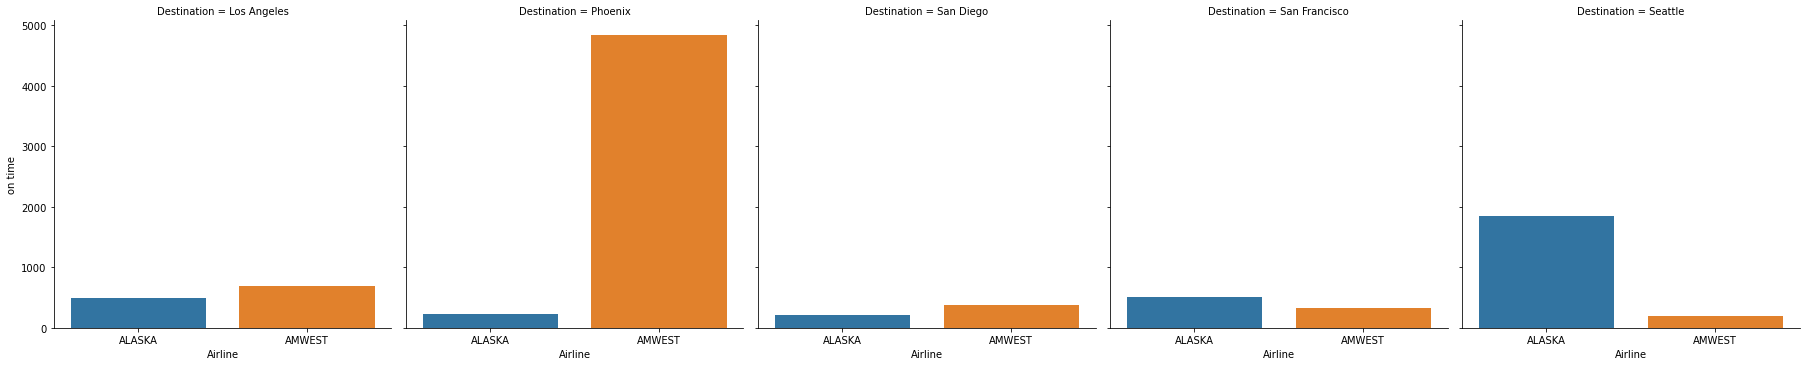

In [36]:
# facet grid for Airline vs on time outliers by point of destination
sns.catplot(x='Airline', y='on time', col='Destination',
               kind='bar', data= c);

Referencing the factet grid above, for Los Angeles, AMWEST has the best on time performance; for Phoenix, AMWEST has the best on time performance; for San Diego, AMWEST has the best on time performance; for San Francisco, ALASKA has the best on time performance; for Seattle, ALASKA has the best on time performance.

### Q2: Which airline had the best overall on time performance?
Now we create a bar chart to display the number of on time in two airlines.

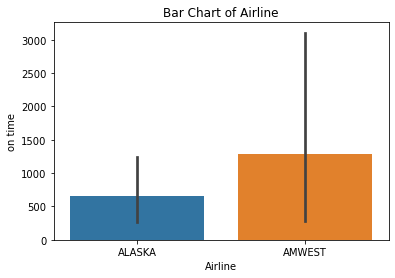

In [37]:
sns.barplot(x='Airline', y='on time', data=c)
plt.title('Bar Chart of Airline');

Referencing the bar chart above, AMWEST has the best overall on time perference.

### Q3: Which airline had the worst overall delayed performance?
Now we create a bar chart to display the number of delayed in two airlines.

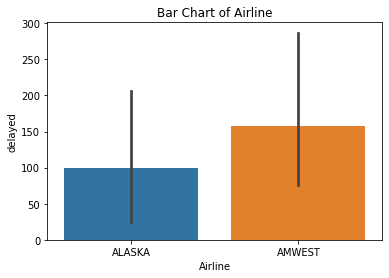

In [38]:
sns.barplot(x='Airline', y='delayed', data=c)
plt.title('Bar Chart of Airline');

Referencing the bar chart above, AMWEST has the worst overall delayed perference.

### Conclusion

The overall goal of this research was to compare the arrival delays for the two airlines. Based on the three questions above, we should recommend ALASKA. Because it has the best overall delayed performance, although its on time performance is not better than AMWEST, it is reasonable to conclude that ALASKA has the best overall delayed performance. 

# 3. Transform your “long” data back into a “wide” format.
To make its “wide” presentation easier to understand and work with, I will use two airlines as two rows, and use on time and delayed as the first level column name, use five destinations as the second level column name.

In [39]:
# fill the missing values
b['Unnamed: 0'].fillna(method='ffill', inplace = True)
# show the data frame
b

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0
4,AMWEST,delayed,117.0,415.0,65.0,129.0,61.0


In [40]:
# extract the specified rows
b1 = b.iloc[[0,2],:]
b1

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,ALASKA,on time,497.0,221.0,212.0,503.0,1841.0
3,AMWEST,on time,694.0,4840.0,383.0,320.0,201.0


In [41]:
# delete the original 'value' column since it is no longer needed
b1.drop(columns=['Unnamed: 0', 'Unnamed: 1'], inplace = True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [42]:
# change the index
b1.index = ['ALASKA', 'AMWEST']
b1

,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
ALASKA,497.0,221.0,212.0,503.0,1841.0
AMWEST,694.0,4840.0,383.0,320.0,201.0


In [43]:
# extract the specified rows
b2 = b.iloc[[1,3],:]
b2

,Unnamed: 0,Unnamed: 1,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
1,ALASKA,delayed,62.0,12.0,20.0,102.0,305.0
4,AMWEST,delayed,117.0,415.0,65.0,129.0,61.0


In [44]:
# delete the original 'value' column since it is no longer needed
b2.drop(columns=['Unnamed: 0', 'Unnamed: 1'], inplace = True)

C:\Users\asus\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [45]:
# change the index
b2.index = ['ALASKA', 'AMWEST']
b2

,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
ALASKA,62.0,12.0,20.0,102.0,305.0
AMWEST,117.0,415.0,65.0,129.0,61.0


In [46]:
# use the pd.concat() function to concatenate the two dataframes
wide = pd.concat([b1, b2], axis=1, keys=['on time', 'delay'], sort = True)
wide

on time                                               delay  \
       Los Angeles Phoenix San Diego San Francisco Seattle Los Angeles   
ALASKA       497.0   221.0     212.0         503.0  1841.0        62.0   
AMWEST       694.0  4840.0     383.0         320.0   201.0       117.0   

                                                
       Phoenix San Diego San Francisco Seattle  
ALASKA    12.0      20.0         102.0   305.0  
AMWEST   415.0      65.0         129.0    61.0